In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
%matplotlib inline

In [3]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

In [5]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

#### Plot Sepal Length and Sepal Width

In [6]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 #min and max sepal length
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 #min and max sepal width

In [7]:
h = .02  # step size in the mesh

In [8]:
a,b = np.meshgrid([0,1,2,3], [0,1])
print(a)

[[0 1 2 3]
 [0 1 2 3]]


In [9]:
print(b)

[[0 0 0 0]
 [1 1 1 1]]


In [10]:
np.c_[a.ravel(),b.ravel()] #we get all combinations of a and b

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1]])

In [11]:
xx, yy = np.meshgrid([0,1,2,3], [0,1,2])
print(xx)

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]


In [12]:
print(yy)

[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]]


In [13]:
np.c_[xx.ravel(),yy.ravel()] 
#we get all combinations of xx and yy. Now we can make predictions on this to plot a decision boundary
# or prediction boundary

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [0, 2],
       [1, 2],
       [2, 2],
       [3, 2]])

In [14]:
y_min, y_max

(1.5, 4.9)

In [15]:
h = .02#.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx,yy

(array([[3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        ...,
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
        [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ]]),
 array([[1.5 , 1.5 , 1.5 , ..., 1.5 , 1.5 , 1.5 ],
        [1.52, 1.52, 1.52, ..., 1.52, 1.52, 1.52],
        [1.54, 1.54, 1.54, ..., 1.54, 1.54, 1.54],
        ...,
        [4.86, 4.86, 4.86, ..., 4.86, 4.86, 4.86],
        [4.88, 4.88, 4.88, ..., 4.88, 4.88, 4.88],
        [4.9 , 4.9 , 4.9 , ..., 4.9 , 4.9 , 4.9 ]]))

In [16]:
np.c_[xx.ravel(),yy.ravel()]

array([[3.8 , 1.5 ],
       [3.82, 1.5 ],
       [3.84, 1.5 ],
       ...,
       [8.36, 4.9 ],
       [8.38, 4.9 ],
       [8.4 , 4.9 ]])

In [17]:
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([0, 0, 0, ..., 2, 2, 2])

In [18]:
Z = Z.reshape(xx.shape)
Z.shape

(171, 231)

In [19]:
Z

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

In [20]:
#plt.colormaps()

In [22]:
xx

array([[3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
       [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
       [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
       ...,
       [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
       [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
       [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ]])

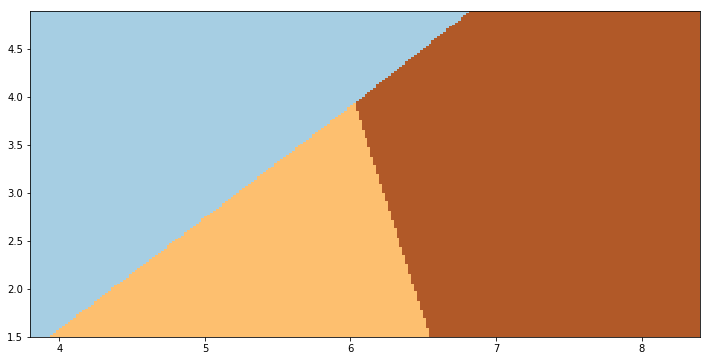

In [24]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(12, 6))
plt.pcolormesh( xx,yy, Z, cmap=plt.cm.Paired) #color map is the chosen cmap
#this will create the prediction boundary for


([], <a list of 0 Text yticklabel objects>)

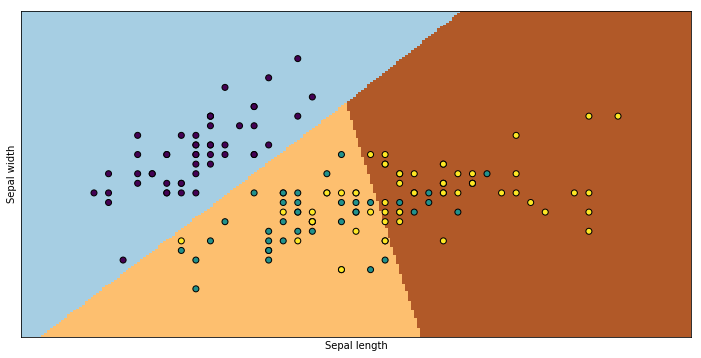

In [25]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(12, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k')
# plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

In [47]:
X = iris.data[:,[2,3]]
cn1, cn2 = iris.feature_names[2:4]

In [48]:
cn1,cn2

('petal length (cm)', 'petal width (cm)')

In [36]:
np.arange(X[:, 0].min()-.5 ,X[:, 0].max()+.5 , .05)

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ,
       1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55,
       1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 ,
       2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65,
       2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 ,
       3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75,
       3.8 , 3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 ,
       4.35, 4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85,
       4.9 , 4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25, 5.3 , 5.35, 5.4 ,
       5.45, 5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 , 5.85, 5.9 , 5.95,
       6.  , 6.05, 6.1 , 6.15, 6.2 , 6.25, 6.3 , 6.35, 6.4 , 6.45, 6.5 ,
       6.55, 6.6 , 6.65, 6.7 , 6.75, 6.8 , 6.85, 6.9 , 6.95, 7.  , 7.05,
       7.1 , 7.15, 7.2 , 7.25, 7.3 , 7.35])

In [50]:
xx,yy = np.meshgrid(np.arange(X[:, 0].min()-.5 ,X[:, 0].max()+.5 , .05), np.arange(X[:, 1].min()-.5 ,X[:, 1].max()+.5 , .05))

In [51]:
arr = np.c_[xx.ravel(),yy.ravel()]

In [52]:
lore = LogisticRegression()
lore.fit(X,Y)
Z= lore.predict(arr)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


([], <a list of 0 Text yticklabel objects>)

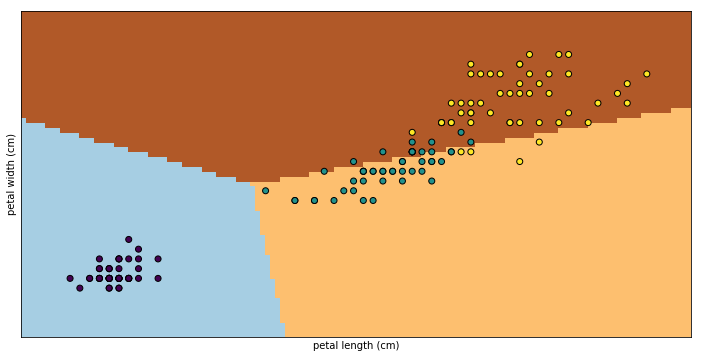

In [53]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(12, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k')
# plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(cn1)
plt.ylabel(cn2)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

In [ ]:
#so decision plots can be used for feature-selection. 